<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [HANDLING WITH OUTLIERS](#1)
* [CATCHING & DETECTING OUTLIERS](#2)
* [REMOVING THE OUTLIERS](#3)    
* [LIMITATION & TRANSFORMATION OF THE OUTLIERS](#4)    
* [THE END OF THE SESSION - 07](#5)

In [ ]:
# Table of Contents
# What is Outlier? : Outliers can create biased results while calculating the stats of the data due to
# .. its extreme nature, thereby affecting data

# Causes of Outliers
# 1.Data entries errors : Yanlış giriş yapılmış olabilir elle 
# 2.Measurement errosr or instrument errors : Cihazda problem olabilir
# 3.Sampling erros    : Örnek çekerken alt sınıf arabalar ve üst sınıf arabaların olduğu bir yerde örneklem sadece bir gruba göre çekilmiş olabilir(Örnek: 9 alt sınıf 1 üst sınıf. gibi...)
# 4.Data processing errors
# 5.Natural novelties in data : Yıllar ile ilgili bir data ile ilgileniyorsunuz diyelim. Ama mesela bu yılın başlarında extreme bir olay 
# .. olmuştur doların sadece o aylarda uçması gibi. Sizin tahminleriniz yanlış olacaktır dolayısıyla

In [ ]:
# Types of Outliers
# 1.Univariate Outliers : Generally referred to as extreme points on a variable : Tek bir sütuna göre outlier incelemesi
# 2.Multivariate Outliers: Generally combination of unusual data points for two or more variables : Iki veya daha fazla sütuna göre outlier incelemesi
# .. Genelde multivariate ile ilgilenmeyeceğiz

In [ ]:
# Detecting Outliers
# 1.Graphs : Box plot, Histogram, Scatter plot
# 2.InterQuartile range(IQR) technique 
# 3.Statistical Tests : Grubbs' test, Chi-square test, Dixon's Q test (Bu kısımla burada ilgilenmeyeceğiz. Bunlar genelde akademik anlamda kullanılıyor)
# Not: Outlierları sayısal sütunlar için bakıyoruz

# Handling with Outliers
# 1.Remove the outliers
# 2.Limitation (winsorize)
### Q1-1.5*IQR = 5 olsun , eğer "4" değeri varsa bunu "5" değerine eşitlerim(baskılarım) 
### Hoca: Bana bu yöntem hiç mantıklı gelmiyor
# NOT: dropping outliers vs limiting outliers?(Hoca: drop daha mantıklı, eğer o outlier yerine bir şey ile dolduramıyorsanız düşmelisiniz(drop etmelisiniz) outlier ları))
# 3.Data transformation(log, square root)
### Örneğin her değerin logaritmasını alınca o değerler outlier olarak görünmeyecek
### Dataları ölçeklendirme işine transformation diyoruz
# 4.Replacing the outliers(mean, median, mode)
# 5.Using different analysis methods(statistical/nonparametric tests)
# 6.Valuing the outliers(Valid reason for the outlier to exist)

# Guideline for Handling Outliers
# If the outlier in question is:
# 1.A measurement error or data entry error, correct the error if possible. If you can't fix it, remove that observation because you know it's incorrect
# 2.Not a part of the population you are studyinh(i.e., unusual properties or conditions), you can legimately remove the outlier
# 3.A natural part of the population you are studying, you should not remove it

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### What is Outlier? [Source](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.)

In general, <b>``Outliers``</b> are **unusual values** in your dataset, and they can **distort statistical analyses and violate their assumptions**. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are.

### Most common causes of outliers on a data set [Source](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561):

- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data) 

### Guideline for Handling Outliers [Source 01](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.) & [Source 02](https://www.researchgate.net/publication/258174106_Best-Practice_Recommendations_for_Defining_Identifying_and_Handling_Outliers)

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Catching and Detecting Outliers</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# Bu gün yapacağımız şeylerde sayısal veriler lazım. Onları seçelim ve df imize eşitleyelim
df = df.select_dtypes(include="number")
df
"""
info about dataset

carat :Carat weight of the diamond
depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
table % :The width of the diamond's table expressed as a percentage of its average diameter
price :the price of the diamond
x :length mm
y :width mm
z :higth mm
"""

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.info() # Herhangi bir NaN değer yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


**info about dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

### Detecting Outliers with Graphs

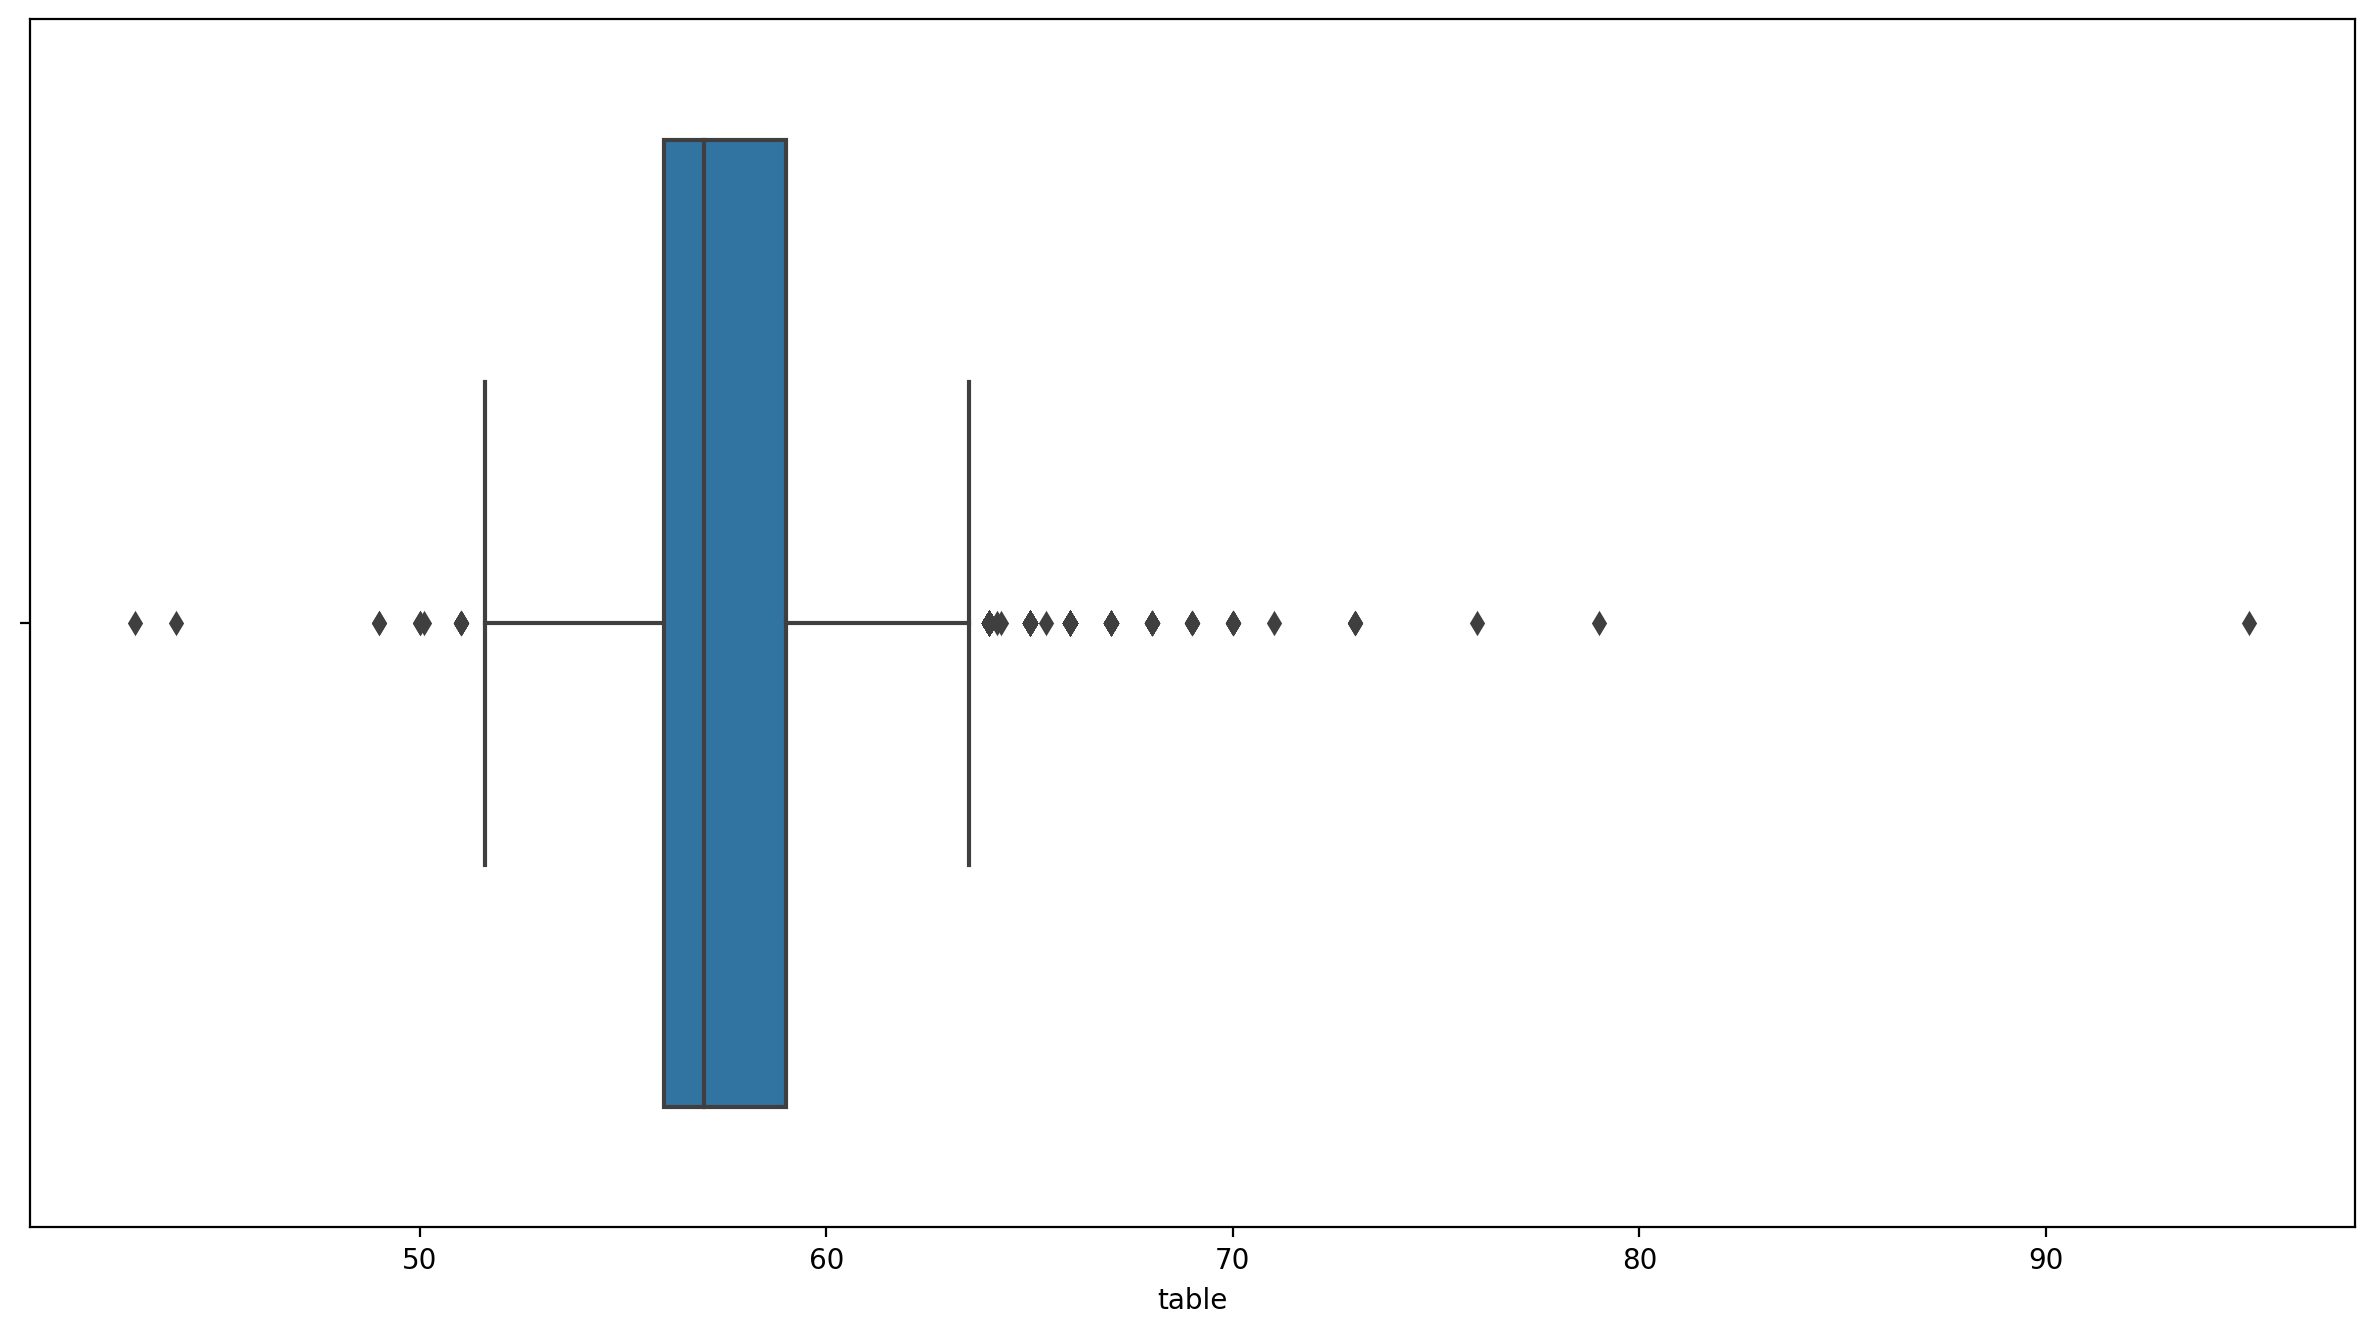

In [12]:
# Detecting Outliers with Graphs
# Önce grafiklerle bakmamız lazım demiştik
plt.figure(figsize=(15,8)) # Default değerleri var ama figsize: 15 e 8 lik olsun dedik. Not: dpi=200 yazarsak parantez içine şekil netleşir
sns.boxplot(x=df.table);   # Bir çok extreme değer olduğunu görüyoruz

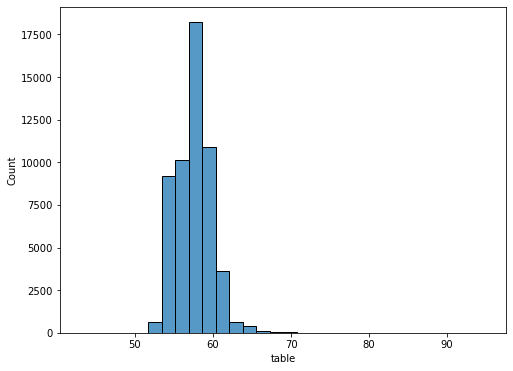

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df.table, bins=30, kde=False); # 80 ve 90 larda değerler olduğunu vs görüyorum
# .. Bu görsellerle bunu anladım. Peki bu extreme değerlerin gerçek değerlerini nasıl görebilirim
# .. sort yapabilirim mesela

In [20]:
df.table.sort_values()

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [21]:
df.table.sort_values().tail(10) # Alttaki değerlerden 10 tane görelim.
# Bunların index değerlerini alıp bu indexlere karşılık gelen diğer sütunlara bakayım

52474    69.0
91       69.0
40211    69.0
777      70.0
47149    70.0
52393    70.0
314      70.0
51026    70.0
52092    70.0
42256    70.0
23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [22]:
tail_index = df.table.sort_values().tail(10).index
tail_index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [23]:
df.loc[tail_index]
# Mesela; 24932 ye baktığımda table, price vs değerleri uyumlu o yüzden bir yanlışlık yok bu outlier değil diye düşünebilirim

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


### Detecting Outliers with Tukey's Fences | Tukey's Rule

**- First way** of specifying **``Q1 & Q3``** is using the **``.quantile()``** method

In [30]:
# Detecting Outliers with Tukey's Fences | Tukey's Rule
# First way of specifying Q1 & Q3 is using the .quantile() method
Q1 = df.table.quantile(0.25) # table sütununda yüzde 25 e denk gelen değer 56
Q1

56.0

In [31]:
Q3 = df.table.quantile(0.75) # table sütununda yüzde 75 e denk gelen değer 59
Q3

59.0

In [29]:
IQR = Q3-Q1
IQR

3.0

**- Second way** of specifying **``Q1 & Q3``** is using the **``.describe()``** method

In [ ]:
# Second way of specifying Q1 & Q3 is using the .describe() method

In [ ]:
df.table.describe()

In [32]:
Q1 = df.table.describe().loc["25%"]
Q3 = df.table.describe().loc["75%"]
IQR = Q3-Q1
IQR

3.0

In [33]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(51.5, 63.5)

In [34]:
(df.table < lower_lim).sum() # lower_lim in altında kaç tane değer olduğunu gösterdik

16

In [35]:
(df.table > upper_lim).sum() # upper_lim in üstünde kaç tane değer olduğunu gösterdik

589

In [ ]:
# Bunların toplamını görelim burada(Kaç tane outlier olduğunu görelim)

In [37]:
((df.table < lower_lim) | (df.table > upper_lim)).sum()

605

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Removing the Outliers</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [41]:
# Removing the Outliers
drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index # outlier ların indexlerini çektik burada sonra bunları atacağız(drop edeceğiz)
drop_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [39]:
df.loc[~((df.table < lower_lim) | (df.table > upper_lim))].index # outlier olmayan değerlerin index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938,
            53939],
           dtype='int64', length=53335)

In [40]:
df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))] # outlier olmayan değerlerden oluşan dataframe
df_cleaned

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [42]:
df.drop(drop_index, axis=0) # 2. yol

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


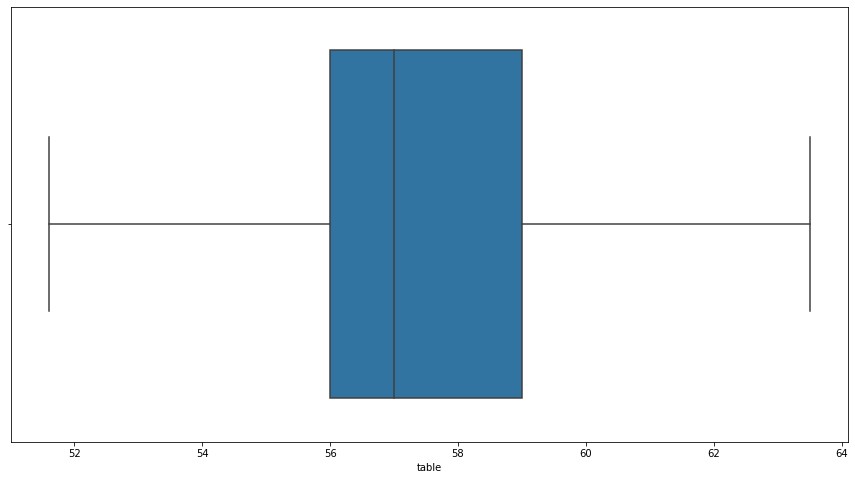

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_cleaned.table); # Grafikte hiç outlier kalmadı gördüğümüz gibi
# Aynı şekilde histograma da bakalım

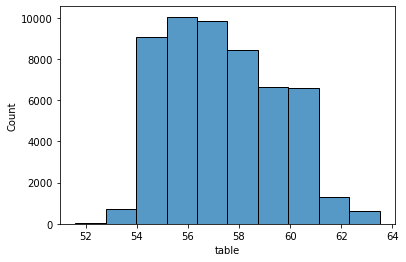

In [53]:
sns.histplot(df_cleaned.table, bins=10, kde=False);

In [56]:
# Describe ile betimsel istatiktiklerini karşılaştıralım şimdi outliersız ve orjinal veriyi
df_cleaned.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [57]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [65]:
# Üsttekileri alıp yan yana kıyaslayalım çıktı da
compare = pd.DataFrame(df.table.describe().values,index=df.table.describe().index, columns = ["first"])
compare["second"] = df_cleaned.table.describe().values
compare

,first,second
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [72]:
pd.DataFrame([df.table.describe(), df_cleaned.table.describe()], index=['first', 'clean']).T # 2. yol

,first,clean
count,53940.000000,53335.000000
mean,57.457184,57.373404
std,2.234491,2.074349
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Limitation & Transformation of the Outliers</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively [Source 01](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0) & [Source 02](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html).

In [66]:
# Limitation using .winsorize() method
# With winsorizing, any value of a variable above or below a percentile k on each side of the
# .. variables’ distribution is replaced with the value of the k-th percentile itself. 
# .. For example, if k=5, all observations above the 95th percentile are recoded to the value
# .. of the 95th percentile, and values below the 5th percent are recoded, respectively

"""
Cautions on Winsorizing Data
Here are a few things to keep in mind when deciding to winsorize data:
1. If there aren’t extreme outliers, then winsorizing the data will only modify the smallest and 
.. largest values slightly. This is generally not a good idea since it means we’re just modifying 
.. data values for the sake of modifications.
2. Outliers can represent interesting edge cases in the data. Thus, before modifying outliers 
.. it’s a good idea to take a closer look at them to see what could have caused them.
3. You should decide whether or not to winsorize data after collecting the data, not before. 
.. You should see if there actually are extreme outliers before you decide to perform winsorization.
.. If no extreme outliers are present, winsorization may be unnecessary.
"""
from scipy.stats.mstats import winsorize

In [67]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [68]:
# winsorize çalışma mantığına bakalım önce
winsorize(df.table, (0.02, 0.05)) # Hangi sütuna winsorize uygulamak istiyorsam onu yazıyorum,
# .. sonra tuple içerisine hangi oranda sıkıştırmak istiyorsam onu yazıyorum
# .. sol taraftan(100 tane outlier varsa) yüzde 2 lik kısmı(2 tanesini) whisker(Q1-1.5) a getirir(eşitler)
# .. sağ taraftan yüzde 5 lik kısmı whisker a getirir(eşitler)

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [71]:
a = len(df.table[df.table<lower_lim])/len(df) # lower_lim den küçük olan değerlerin yüzdesi
a

0.00029662588060808305

In [73]:
b = len(df.table[df.table>upper_lim])/len(df) # upper_lim den büyük olan değerlerin yüzdesi
b

0.010919540229885057

In [75]:
# Şimdi bu winsorize içerisine a ve b yi yazarsam daha mantıklı bir iş yapmış olurum
table_win = winsorize(df.table, (a,b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

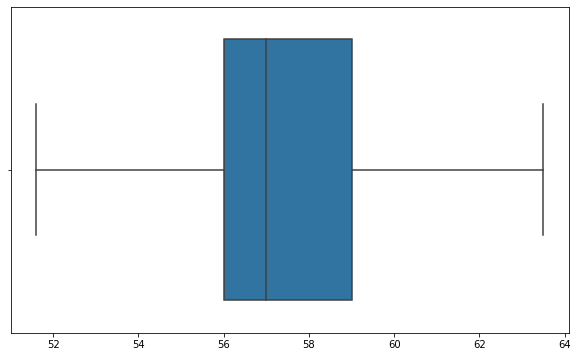

In [76]:
# Şimdi bunu görselleştirelim
plt.figure(figsize=(10,6))
sns.boxplot(x=table_win); # Gördüğümüz gibi extreme değerlerden kurtulmuş olduk

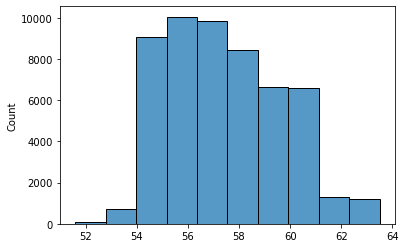

In [79]:
sns.histplot(table_win, bins=10, kde=False); # Gördüğümüz gibi extreme değerlerden kurtulmuş olduk

In [80]:
table_win_ser = pd.Series(table_win) # Table_win i seriye çevirirsek daha kolay işlem yaparız
table_win_ser

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [82]:
pd.DataFrame([df.table.describe(), table_win_ser.describe()], index=['first', 'clean']).T # 2. yol

,first,clean
count,53940.000000,53940.000000
mean,57.457184,57.438591
std,2.234491,2.161059
min,43.000000,51.600000
25%,56.000000,56.000000
50%,57.000000,57.000000
75%,59.000000,59.000000
max,95.000000,63.500000


In [83]:
df.table.sort_values().head(20)
# min=51.6 olan değere eşitlemiş mi değerlerimi(outlier ları) bakalım (küçük olanlar için)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [84]:
table_win_ser.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

## Transformation using ``log()`` method

The **``Numpy.log()``** method lets you calculate the mathematical log of any number or array. The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e [Source 01](https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.) & [Source 02](https://numpy.org/doc/stable/reference/generated/numpy.log.html).

In [ ]:
# Transformation using log() method
# The Numpy.log() method lets you calculate the mathematical log of any number or array. 
# .. The numpy.log() is a mathematical function that helps user to calculate Natural 
# .. logarithm of x where x belongs to all the input array elements.
# The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. 
# .. The natural logarithm is logarithm in base.

# Transformation using log() method
# En sık kullanılan yöntem log almaktır.

In [85]:
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

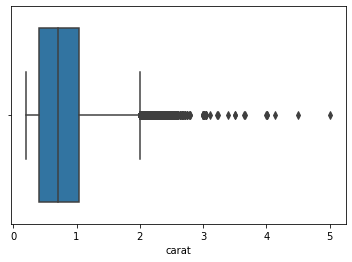

In [86]:
sns.boxplot(x=df.carat); # Çok fazla outlier görünüyor

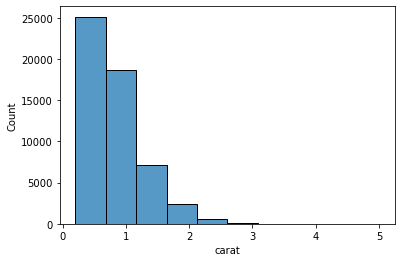

In [87]:
sns.histplot(df.carat, bins=10, kde=False);

In [90]:
carat_log = np.log(df.carat) # Carat sütununundaki tüm değerlerin log unu aldık
# Tekrar boxplot a bakalım outlier lar ne hale gelmiş
carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

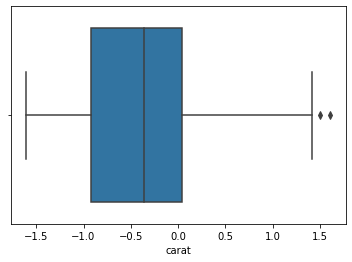

In [92]:
sns.boxplot(x=carat_log);

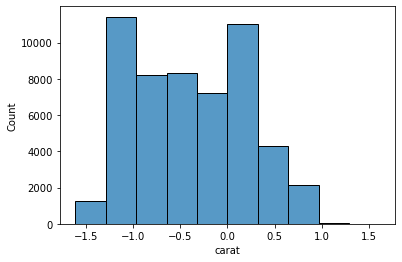

In [93]:
sns.histplot(carat_log, bins=10,kde=False);

In [94]:
df["carat_log"] = np.log(df.carat)
df

C:\Users\cansi\AppData\Local\Temp/ipykernel_10600/2758130631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["carat_log"] = np.log(df.carat)


,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


## Removing outliers after log() transformation

**first method to drop outliers**

In [95]:
# Removing outliers after log() transformation
# first method to drop outliers
df.carat_log.sort_values().tail(2)

27630    1.504077
27415    1.611436
Name: carat_log, dtype: float64

In [96]:
drop_index = df.carat_log.sort_values().tail(2).index
drop_index

Int64Index([27630, 27415], dtype='int64')

In [97]:
df.drop(drop_index, axis=0) # Bu 2 indexi drop ettik

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


**second method to drop outliers**

In [ ]:
# Hoca: Siz yapın (Üstte yaptığımız gibi)

**third method to drop outliers**

In [ ]:
# Hoca: Siz yapın (Üstte yaptığımız gibi)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 08</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

____